In [4]:
# Before running, run following commands to install YOLOv8
# Note: the notebooks was run on the "Python 3.10 - SDK V2" env. in Azure ML.
# Note: you can install YOLOv8 directly via SDK: pip install ultralytics

# He Zhang, Feb, 2023

In [5]:
# install YOLOv8 / ultralytics
%pip install ultralytics==8.0.20

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Torch: 1.13.1+cu117
Torchvision: 0.14.1+cu117
GPU: 4 Tesla M60


In [7]:
# import ultralytics / YOLOv8, and do self-checks
import ultralytics
from ultralytics import YOLO

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
Setup complete ✅ (24 CPUs, 220.4 GB RAM, 66.1/118.1 GB disk)


In [16]:
# create a folder to host YOLOv8 artefacts
import os

folder_name = "yolov8"
os.makedirs(folder_name) if not os.path.exists(folder_name) else print("folder exists!")

folder exists!


In [18]:
# test a pre-trained YOLOv8 model - SDK
model = YOLO(f"{folder_name}/yolov8n.pt")
results = model.predict(source="datasets/test_images/samples/zidane.jpg", 
                        save=True, project="./yolov8/runs", conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Results saved to yolov8/runs/predict


Bboxes:
 tensor([[ 123.,  197., 1111.,  711.],
        [ 747.,   41., 1142.,  712.],
        [ 437.,  437.,  524.,  714.]], device='cuda:0')
Confidence Score:
 tensor([0.80557, 0.79367, 0.37022], device='cuda:0')
Class Indices:
 tensor([ 0.,  0., 27.], device='cuda:0')


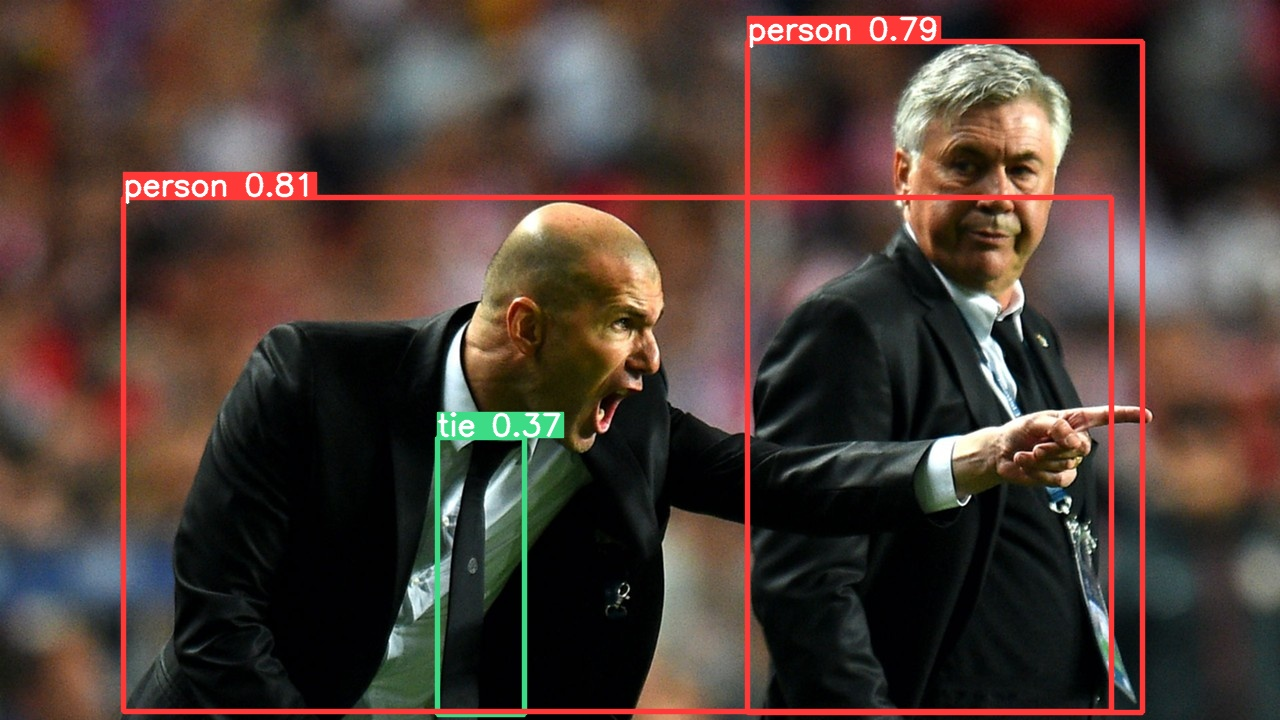

In [20]:
# check detection results
from IPython.display import display, Image

print("Bboxes:\n", results[0].boxes.xyxy)
print("Confidence Score:\n", results[0].boxes.conf)
print("Class Indices:\n", results[0].boxes.cls)
Image(filename=f"{folder_name}/runs/predict/zidane.jpg", width=500, height=400)